In [11]:
import matplotlib as matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [12]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

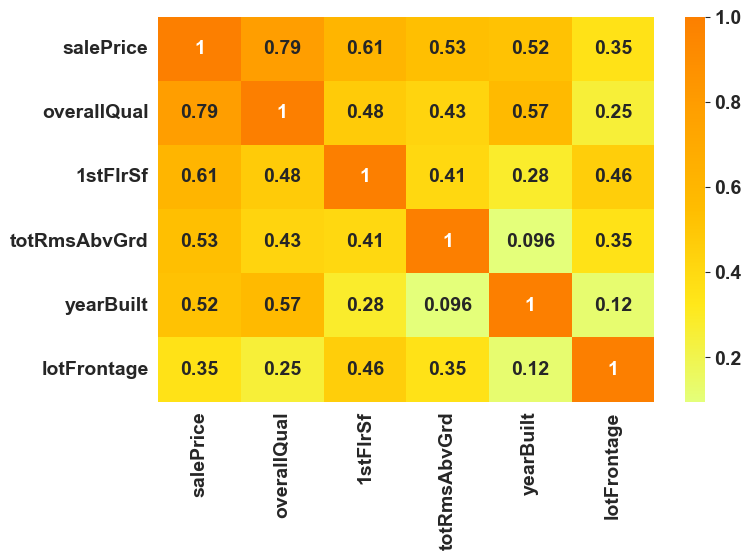

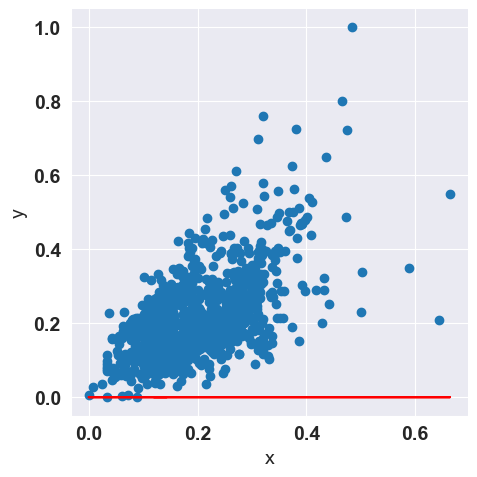

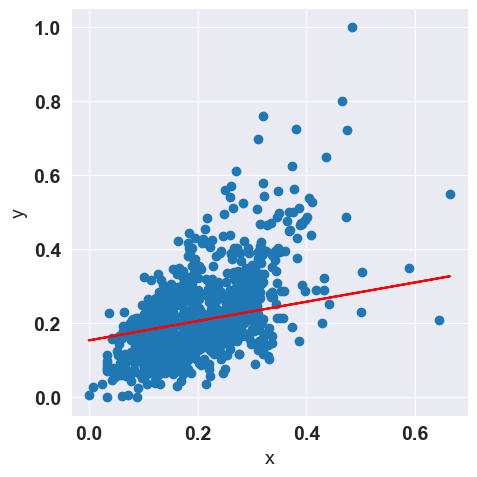

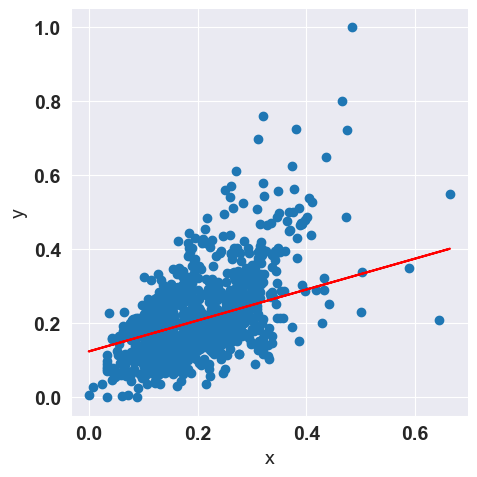

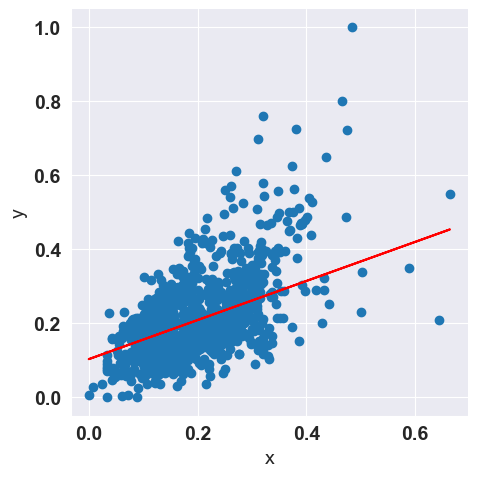

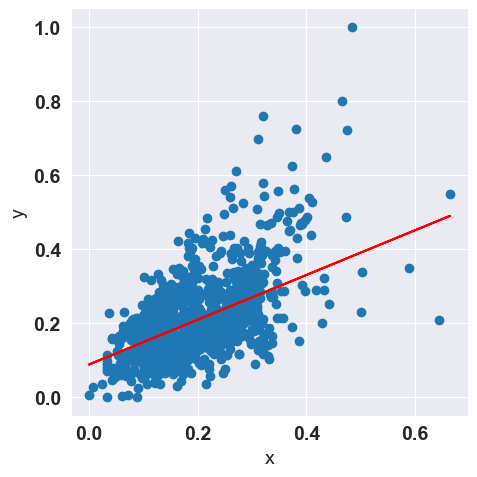

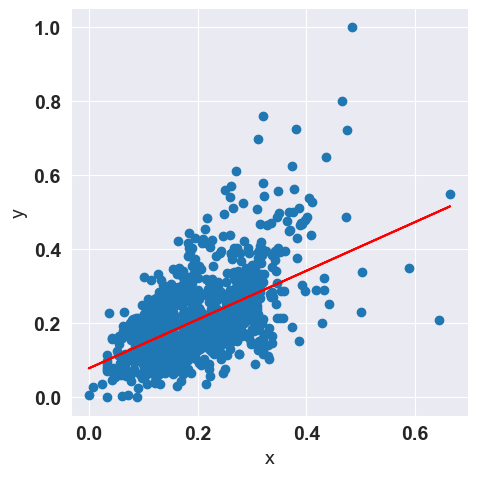

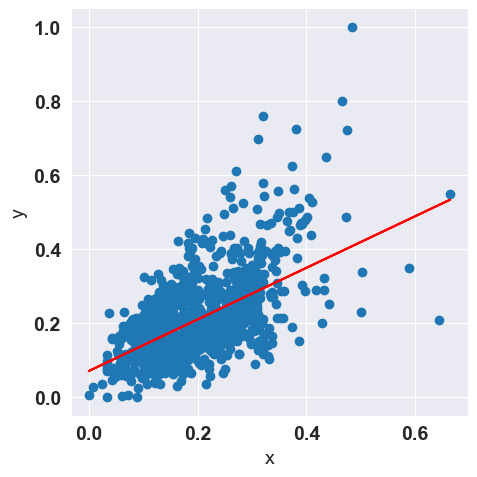

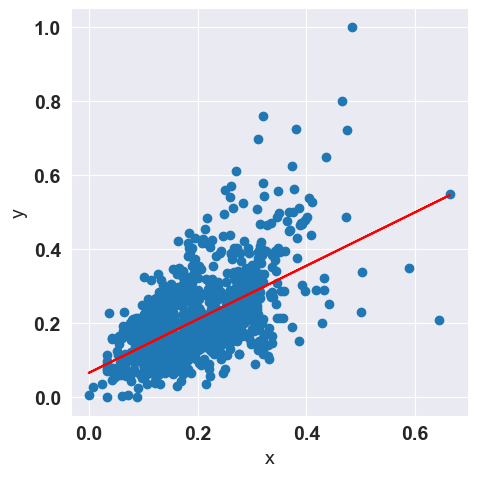

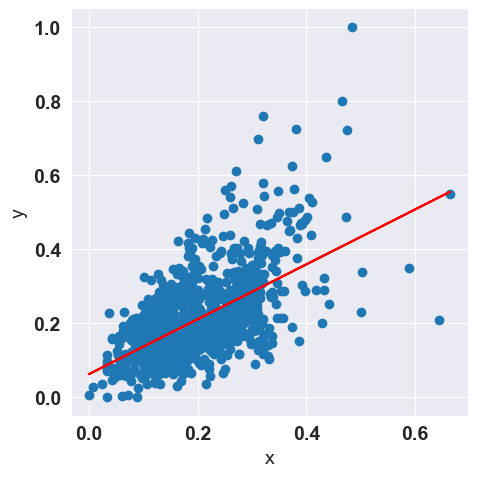

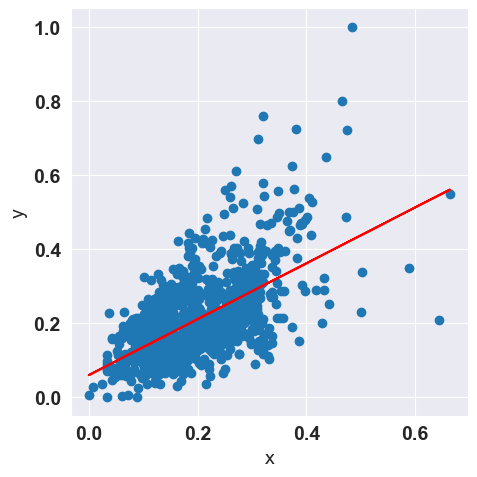

[0.05799358 0.76502523]
[0.026451229032724462, 0.010565089804621187, 0.006862169047807185, 0.005990606463641845, 0.005777106315490884, 0.005716612050611836, 0.005691752143288475, 0.005675249873517239, 0.005660765814711715, 0.00564682619837794, 0.0056330879986312395, 0.005619470968624579, 0.0056059559329485285, 0.005592537912422545, 0.00557921523065675, 0.00556598698248053, 0.005552852445600181, 0.005539810943847132, 0.005526861815372266, 0.005514004405229063, 0.0055012380636246415, 0.005488562145488186, 0.0054759760103456874, 0.005463479022266044, 0.005451070549823932, 0.0054387499660667315, 0.005426516648482586, 0.00541436997896888, 0.005402309343800999, 0.005390334133601313, 0.0053784437433083915, 0.005366637572146425, 0.005354915023594874, 0.005343275505358334, 0.005331718429336596, 0.005320243211594944, 0.005308849272334647, 0.005297536035863664, 0.005286302930567554, 0.0052751493888806, 0.005264074847257126, 0.005253078746143029, 0.0052421605299475, 0.005231319647014963, 0.0052205

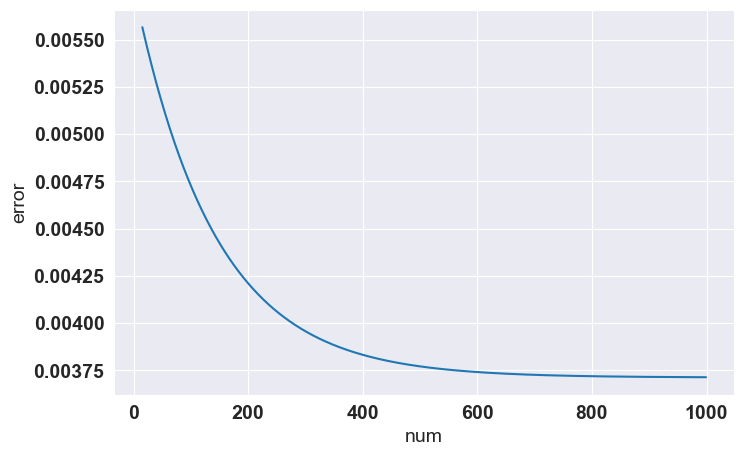

[[0.11977972]
 [0.21294172]
 [0.13446535]
 ...
 [0.26801285]
 [0.31206976]
 [0.14341441]]
[[0.24107763]
 [0.20358284]
 [0.26190807]
 ...
 [0.27533676]
 [0.29225108]
 [0.19177892]]
coeff [[0.78645676]]
mse 0.00990309978221608


In [13]:
class simpleLinearRegression:

    def __init__(self):
        self.data = np.load('proyecto_training_data.npy')
        self.df = pd.DataFrame(self.data, columns=['salePrice', 'overallQual', '1stFlrSf', 'totRmsAbvGrd', 'yearBuilt', 'lotFrontage'])
        self.train = None
        self.test = None
        self.error_vector = []

    #Eda functions
    def dataDescribe(self):
        print(self.df.describe())

    def eda_nulls(self):
        plt.figure(figsize=(12,4))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title('Null values')
        print(self.df.isna().sum())

    def eda_displot(self):
        for column in self.df.columns:
            plt.figure()
            sns.displot(data=self.df[column], kde=True, color='y')
            plt.title('Dist of '+column)

    def eda_corr(self):
        corr = self.df.corr()
        sns.heatmap(corr, cmap='Wistia', annot=True)

    def eda_scatter(self):
        for column in self.df.columns:
            plt.figure(figsize=(12,4))
            plt.scatter(x='salePrice',y=column, c='y', data=self.df )
            plt.title('Saleprice vs '+ column)

    #Model functions
    def normalize(self, df):
        return (self.df-self.df.min())/(self.df.max()-self.df.min())

    def train_test_split(self):
        df_normalizado = self.normalize(self.df)
        self.train, self.test = np.split(df_normalizado, [int(0.80*len(df_normalizado))])
        return self.train, self.test

    def linear_reg_model(self, x, y, epochs, imprimir_error_cada, learning_rate):
        model_result = {}
        B = np.ones(len(x))
        A = np.stack([B,x]).T

        A_rows, A_columns = A.shape
        b0b1 = np.zeros(A_columns)
        data_train = pd.DataFrame({'x':x, 'y': y})

        for i in range(epochs):
            y_pred = A.dot(b0b1)
            error = y_pred - y.values
            gd = A.T.dot(error) / A_rows
            b0b1 -= learning_rate * gd

            error = np.sum((y - y_pred) ** 2) / (2 * A_rows)
            self.error_vector.append(error)
            if i % imprimir_error_cada == 0:
                g = sns.FacetGrid(data_train, height=5)
                g = g.map(plt.scatter, 'x', 'y')
                plt.plot(x, y_pred, color='r')
                plt.show()

            #dict de modelos
            model_result[i] = b0b1

        print(b0b1)
        print(self.error_vector)
        print(min(self.error_vector))
        print(max(self.error_vector))

        #print(model_result)

        x_axis = range(0,epochs)
        print(x_axis)
        print(len(self.error_vector))
        data = {'num':x_axis, 'error':self.error_vector}
        df_data = pd.DataFrame(data)
        df_data = df_data.iloc[15:, :]
        sns.lineplot(data=df_data, x='num', y='error')
        plt.show()

        return model_result, self.error_vector


    def sklearn_model(self, x, y, x_test, y_test):
        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)
        x_test = x_test.values.reshape(-1,1)
        y_test = y_test.values.reshape(-1,1)
        print(x)
        print(y)

        regr = linear_model.LinearRegression()
        regr.fit(x,y)

        y_pred_sk = regr.predict(x_test)

        print('coeff', regr.coef_)
        print('mse', mean_squared_error(y_test, x_test))

r = simpleLinearRegression()
#print(r.data)
#r.dataDescribe()
#r.eda_nulls()
#r.eda_displot()
r.eda_corr()
#r.eda_scatter()
train, test = r.train_test_split()

md1_result, error_vector_1 = r.linear_reg_model(train['1stFlrSf'],train['salePrice'],1000,100, 0.5)

r.sklearn_model(train['1stFlrSf'],train['salePrice'], test['1stFlrSf'],test['salePrice'])
